In [ ]:
'''
CLASS: Model evaluation procedures
'''

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
## TRAIN AND TEST ON THE SAME DATA (OVERFITTING)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
knn.score(X, y)

1.0

In [7]:
## TEST SET APPROACH

# understanding train_test_split
from sklearn.cross_validation import train_test_split

In [8]:
features = np.array([range(10), range(10, 20)]).T
features  # 2D array

array([[ 0, 10],
       [ 1, 11],
       [ 2, 12],
       [ 3, 13],
       [ 4, 14],
       [ 5, 15],
       [ 6, 16],
       [ 7, 17],
       [ 8, 18],
       [ 9, 19]])

In [9]:
response = ['even', 'odd'] * 5
response  # 1D array


['even', 'odd', 'even', 'odd', 'even', 'odd', 'even', 'odd', 'even', 'odd']

In [24]:
# step 1: split data into training set and test set
features_train, features_test, response_train, response_test \
= train_test_split(features, response, random_state=4)
# the random_state allows us all to get the same random numbers

In [25]:
features_train  # 70% of the training set

array([[ 9, 19],
       [ 2, 12],
       [ 6, 16],
       [ 0, 10],
       [ 1, 11],
       [ 5, 15],
       [ 7, 17]])

In [26]:
features_test   # remaining 30% of the training set

array([[ 3, 13],
       [ 8, 18],
       [ 4, 14]])

In [27]:
response_train  #  70% of the responses, the SAME ones as features_train

['odd', 'even', 'even', 'even', 'odd', 'odd', 'odd']

In [28]:
response_test   # reamining 30%, SAME as features_test

['odd', 'even', 'even']

In [31]:
# steps 2 and 3: calculate test set error for K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(features_train, response_train)      # Note that I fit to the training
knn.score(features_test, response_test)      # and scored on the test set

0.0

In [45]:
# Suppose you watch a soccer game and memorize their patterns
# If you rewind the game and then were asked to predict
# the outcome, you'd know right?! That's why we train on one game
# and then get tested on our predictive ability on another game

# Overfitting

# step 4 (parameter tuning): calculate test set error for K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features_train, response_train)
knn.score(features_test, response_test)

0.66666666666666663

In [46]:
# steps 5 and 6: choose best model (K=3) and train on all data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [47]:
# There are two types of data we will deal with in ML
# In sample and Out of sample data
# the in-sample data consists of our training and test sets
#   Note we know the answer to all of them!
# the out-of-sample data are data that we really haven't seen before
#   They're the reason we built it in the first time!

# step 7: make predictions on new ("out of sample") data
out_of_sample = [[5, 4, 3, 2], [4, 3, 2, 1]]
knn.predict(out_of_sample)

array([1, 0])

In [48]:
# verify that a different train/test split can result in a different test set error
features_train, features_test, response_train, response_test \
= train_test_split(X, y, random_state=1)
# I used a different random state so we all get the same results
# but different from the random_state = 4 from before!

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

1.0

In [50]:
# Using a training set and test set is so important
# Just as important is cross validation. Cross validation is
# Just using several different train test splits and 
#   averaging your results!

## CROSS-VALIDATION

# check CV score for K=1
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [53]:
scores              # It ran a KNN 5 times!
# We are looking at the accuracy for each of the 5 splits

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

In [54]:
np.mean(scores)     # Average them together

0.95999999999999996

In [55]:
# check CV score for K=5
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores
np.mean(scores)

0.97333333333333338

In [56]:
# search for an optimal value of K
k_range = range(1, 30, 2)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=5, scoring='accuracy')))
scores

[0.95999999999999996,
 0.96666666666666679,
 0.97333333333333338,
 0.98000000000000009,
 0.97333333333333338,
 0.98000000000000009,
 0.97333333333333338,
 0.96666666666666679,
 0.96666666666666679,
 0.96666666666666679,
 0.96666666666666679,
 0.95999999999999996,
 0.95999999999999996,
 0.94666666666666666,
 0.93333333333333324]

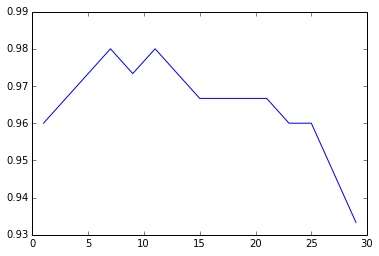

In [57]:
# plot the K values (x-axis) versus the 5-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)

In [58]:
# automatic grid search for an optimal value of K
from sklearn.grid_search import GridSearchCV
knn = KNeighborsClassifier()
k_range = range(1, 30, 2)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [59]:
# this will check K=1, K=2, all the way up to 30,
# and then do cross validation on each one!
# thats 30 * 5 = 150 fits and scoring!

In [60]:
# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]

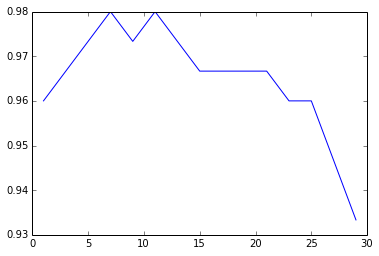

In [61]:
# plot the results
plt.figure()
plt.plot(k_range, grid_mean_scores)

In [62]:
grid.best_score_     # shows us the best score

0.97999999999999998

In [63]:
grid.best_params_    # shows us the optimal parameters

{'n_neighbors': 7}

In [64]:
grid.best_estimator_ # this is the actual model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=7, p=2, weights='uniform')